In [1]:
# load packages
import numpy as np
import pandas as pd
# import napari
import tifffile as tf
from skimage import io # import tiff file as ndarray
import os
import matplotlib.pyplot as plt

# import custum colormaps
from colormaps import *

# import custum functions
from STP_plotting import *
from STP_processing import *

# auto refreshes imported functions if source code changes:
%load_ext autoreload
%autoreload 2



In [39]:
# choose based on run in acadia or home computer
home_dir = "/mnt/labNAS/"
# home_dir = "/Volumes/Data/"

metadata = pd.read_csv("stp_metadata.csv")

in_path = home_dir+"Emily/STP_for_MAPseq/4_python_output/input_tifs/"
out_path = home_dir+"Emily/STP_for_MAPseq/4_python_output/output_figs/"

# add paths to metadata
# output of mean_subtract_individuals.py
for i in range(metadata.shape[0]):
    b_path = in_path+"norm_subtracted/p05_mean_subtracted/"+metadata.loc[i, 'brain']+"_p05_norm_subtracted.tif"

    metadata.loc[i,"p05_path"] = b_path

# area list from make_masks.py
areas = ["grey", "CTX", "OMCc", "ACAc", "aud","TH", "STR", "CP", "AMY", "P", "PG", "MB", "PAG", "SCm", 
         "SNr", "HY", "CNU", "TEa", "ECT", "VISC", "AI", "GU", "BS", "HIP"]


In [40]:
# load masks for each individually aligned brain
from time import time
start = time()
# make dictionary where keys = areas, values=list of masks corresponding to metadata order
mask_dict = {}
for area in areas:
    area_masks = []
    print("working on", area)
    for i in range(metadata.shape[0]):
        print("\t", metadata.loc[i,"brain"])
        save_folder = in_path+"masks/"+metadata.loc[i,"brain"]+"_masks/"
        with open(save_folder+metadata.loc[i,"brain"]+"_"+area+".npy", "rb") as f:
            area_masks.append(np.load(f))
        
    mask_dict[area] = area_masks

# for area in mask_dict:
#     print(area, ": \t", len(mask_dict[area]))

end = time()
print("took", end-start, "seconds to load")

working on grey
	 ACC_MMus_230403_b1
	 ACC_MMus_230404_b2
	 ACC_MMus_230427_b3
	 ACC_STeg_230308_b1
	 ACC_STeg_230322_b2
	 ACC_STeg_230501_b3
	 OMC_MMus_220119_b0
	 OMC_MMus_220303_b1
	 OMC_MMus_220324_b2
	 OMC_STeg_220208_b0
	 OMC_STeg_220411_b1
	 OMC_STeg_220429_b2
working on CTX
	 ACC_MMus_230403_b1
	 ACC_MMus_230404_b2
	 ACC_MMus_230427_b3
	 ACC_STeg_230308_b1
	 ACC_STeg_230322_b2
	 ACC_STeg_230501_b3
	 OMC_MMus_220119_b0
	 OMC_MMus_220303_b1
	 OMC_MMus_220324_b2
	 OMC_STeg_220208_b0
	 OMC_STeg_220411_b1
	 OMC_STeg_220429_b2
working on OMCc
	 ACC_MMus_230403_b1
	 ACC_MMus_230404_b2
	 ACC_MMus_230427_b3
	 ACC_STeg_230308_b1
	 ACC_STeg_230322_b2
	 ACC_STeg_230501_b3
	 OMC_MMus_220119_b0
	 OMC_MMus_220303_b1
	 OMC_MMus_220324_b2
	 OMC_STeg_220208_b0
	 OMC_STeg_220411_b1
	 OMC_STeg_220429_b2
working on ACAc
	 ACC_MMus_230403_b1
	 ACC_MMus_230404_b2
	 ACC_MMus_230427_b3
	 ACC_STeg_230308_b1
	 ACC_STeg_230322_b2
	 ACC_STeg_230501_b3
	 OMC_MMus_220119_b0
	 OMC_MMus_220303_b1
	 OMC_MMus_22

# NO SUBTRACTION

## OMC

In [71]:
# import images
p05_path = in_path+"norm_subtracted/p05_mean_subtracted/"
p05_images = []
for i in range(metadata.shape[0]):
    p05_images.append(tf.imread(p05_path+metadata.loc[i,'brain']+"_p05_NO_subtracted.tif"))


In [72]:
# set areas that match w/ mapseq data
areas_plot = ["OMCc", "CP", "aud", "AMY", "TH", "HY", "SNr", "SCm", "PG", "PAG", "BS", "HIP"]


In [45]:
omc_fluor = calc_fluor_individ(p05_images, metadata, mask_dict, areas_to_plot=areas_plot, inj_site="OMC")
omc_fluor

,area,Fluorescence,Volume_mm3,brain,species,inj_site
0,OMCc,6412.84380,10997.38,OMC_MMus_220119_b0,MMus,OMC
1,CP,15781.77724,25723.74,OMC_MMus_220119_b0,MMus,OMC
2,aud,956.64824,5689.82,OMC_MMus_220119_b0,MMus,OMC
3,AMY,482.82159,3555.58,OMC_MMus_220119_b0,MMus,OMC
4,TH,10105.07269,19758.36,OMC_MMus_220119_b0,MMus,OMC
...,...,...,...,...,...,...
67,SCm,1292.25799,5598.34,OMC_STeg_220429_b2,STeg,OMC
68,PG,290.36116,631.90,OMC_STeg_220429_b2,STeg,OMC
69,PAG,807.49084,3869.04,OMC_STeg_220429_b2,STeg,OMC
70,BS,674.69179,3665.80,OMC_STeg_220429_b2,STeg,OMC


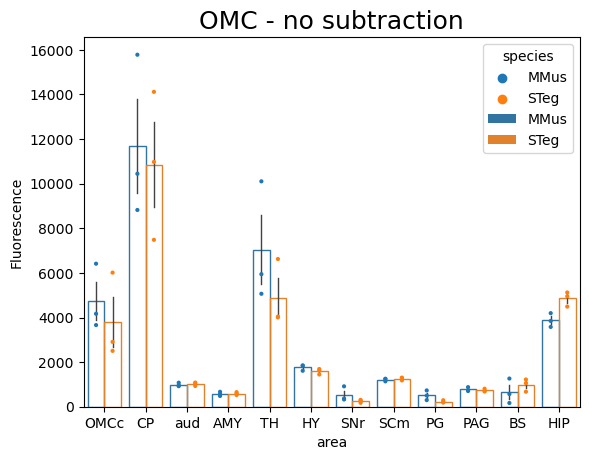

In [46]:
# make dot plot
dot_bar_plot(omc_fluor, title="OMC - no subtraction", xaxis="area", yaxis="Fluorescence", hueaxis="species")
plt.show()

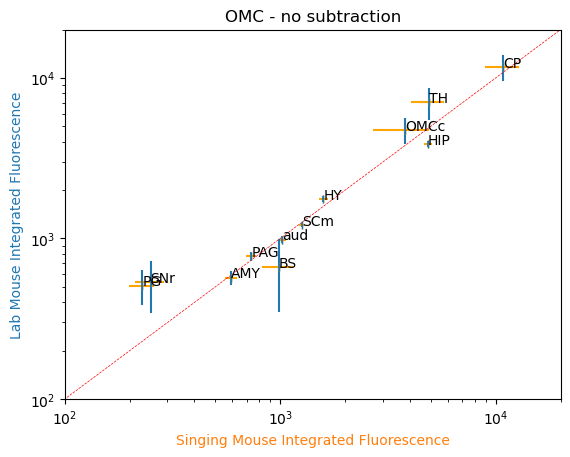

In [47]:
stvmm_area_scatter(omc_fluor, title="OMC - no subtraction", ax_limits=(100,20000))
plt.show()

## ACC

In [74]:
areas_plot = ["ACAc", "CP", "aud", "AMY", "TH", "HY", "SNr", "SCm", "PG", "PAG", "BS", "HIP"]

acc_fluor = calc_fluor_individ(p05_images, metadata, mask_dict, areas_to_plot=areas_plot, inj_site="ACC")


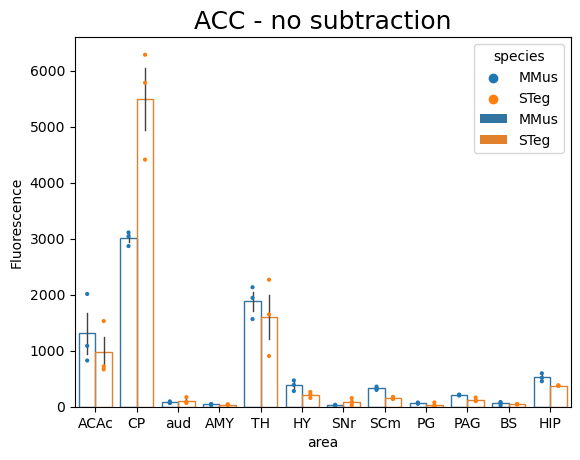

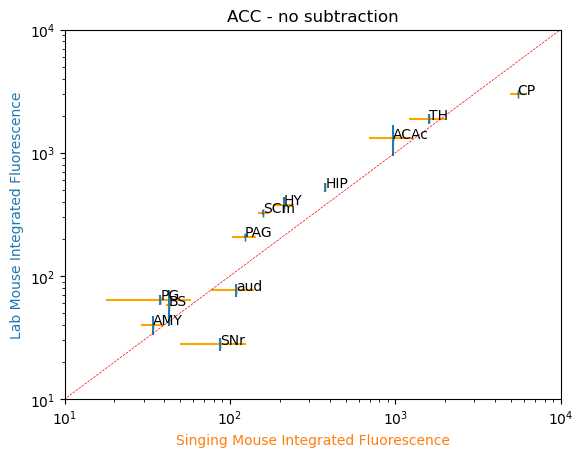

In [75]:
# make dot plot
dot_bar_plot(acc_fluor, title="ACC - no subtraction", xaxis="area", yaxis="Fluorescence", hueaxis="species")
plt.show()

# make scatterplot
stvmm_area_scatter(acc_fluor, title="ACC - no subtraction", ax_limits=(10,10000))
plt.show()

# Linear scale

In [50]:
# import images
p05_path = in_path+"norm_subtracted/p05_mean_subtracted/"
p05_images = []
for i in range(metadata.shape[0]):
    p05_images.append(tf.imread(p05_path+metadata.loc[i,'brain']+"_p05_NO_subtracted.tif"))


In [51]:
## OMC
# set areas that match w/ mapseq data
areas_plot = ["OMCc", "CP", "aud", "AMY", "TH", "HY", "SNr", "SCm", "PG", "PAG", "BS"]

omc_fluor = calc_fluor_individ(p05_images, metadata, mask_dict, areas_to_plot=areas_plot, inj_site="OMC")
omc_fluor


,area,Fluorescence,Volume_mm3,brain,species,inj_site
0,OMCc,6412.84380,10997.38,OMC_MMus_220119_b0,MMus,OMC
1,CP,15781.77724,25723.74,OMC_MMus_220119_b0,MMus,OMC
2,aud,956.64824,5689.82,OMC_MMus_220119_b0,MMus,OMC
3,AMY,482.82159,3555.58,OMC_MMus_220119_b0,MMus,OMC
4,TH,10105.07269,19758.36,OMC_MMus_220119_b0,MMus,OMC
...,...,...,...,...,...,...
61,SNr,307.80698,1055.94,OMC_STeg_220429_b2,STeg,OMC
62,SCm,1292.25799,5598.34,OMC_STeg_220429_b2,STeg,OMC
63,PG,290.36116,631.90,OMC_STeg_220429_b2,STeg,OMC
64,PAG,807.49084,3869.04,OMC_STeg_220429_b2,STeg,OMC


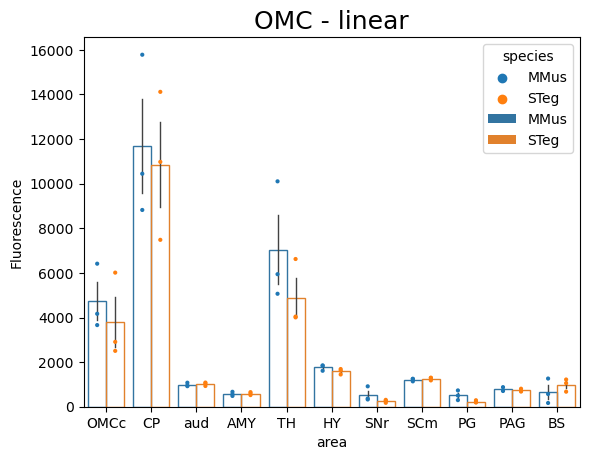

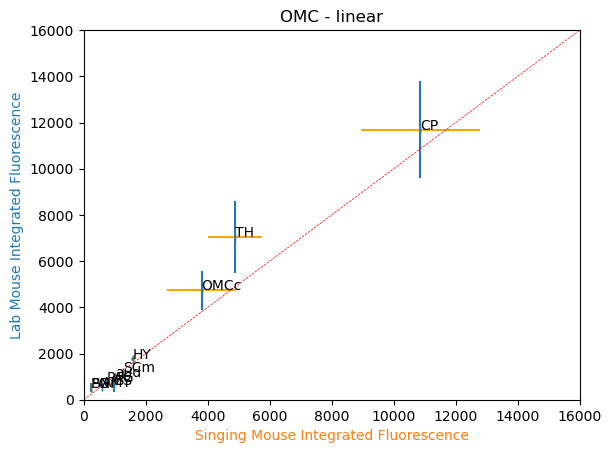

In [52]:
# make dot plot
dot_bar_plot(omc_fluor, title="OMC - linear", xaxis="area", yaxis="Fluorescence", 
             hueaxis="species")
plt.show()
stvmm_area_scatter(omc_fluor, title="OMC - linear", ax_limits=(0,16000), log=False)
plt.show()



In [53]:
## ACC
areas_plot = ["ACAc", "CP", "aud", "AMY", "TH", "HY", "SNr", "SCm", "PG", "PAG", "BS"]

acc_fluor = calc_fluor_individ(p05_images, metadata, mask_dict, areas_to_plot=areas_plot, inj_site="ACC")
acc_fluor


,area,Fluorescence,Volume_mm3,brain,species,inj_site
0,ACAc,1085.89226,2857.06,ACC_MMus_230403_b1,MMus,ACC
1,CP,3110.44317,25513.74,ACC_MMus_230403_b1,MMus,ACC
2,aud,66.86299,6602.36,ACC_MMus_230403_b1,MMus,ACC
3,AMY,46.32795,4212.38,ACC_MMus_230403_b1,MMus,ACC
4,TH,1943.69694,19682.74,ACC_MMus_230403_b1,MMus,ACC
...,...,...,...,...,...,...
61,SNr,84.57716,1178.58,ACC_STeg_230501_b3,STeg,ACC
62,SCm,135.51177,5714.96,ACC_STeg_230501_b3,STeg,ACC
63,PG,13.42155,427.36,ACC_STeg_230501_b3,STeg,ACC
64,PAG,164.40060,4058.08,ACC_STeg_230501_b3,STeg,ACC


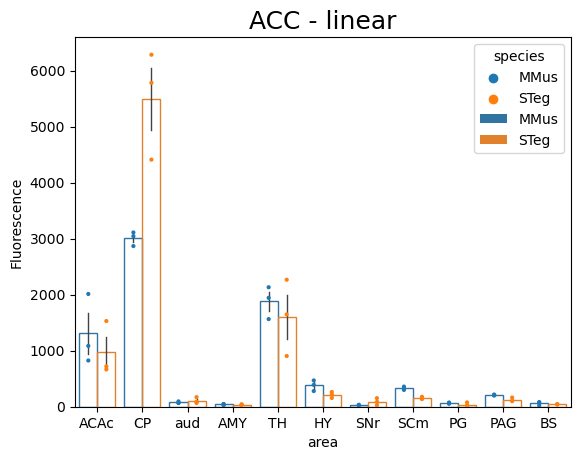

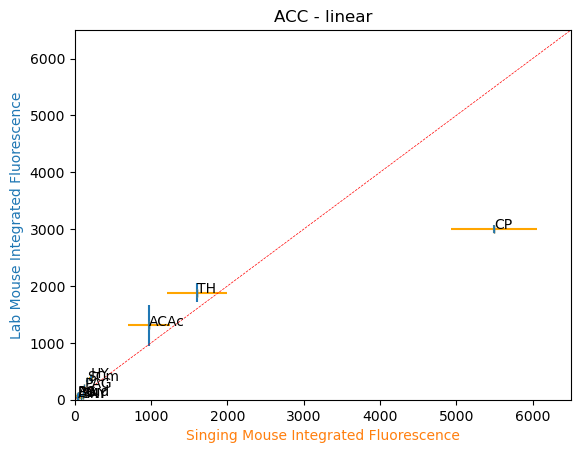

In [54]:

# make dot plot
dot_bar_plot(acc_fluor, title="ACC - linear", xaxis="area", yaxis="Fluorescence",
             hueaxis="species")
plt.show()

# make scatterplot
stvmm_area_scatter(acc_fluor, title="ACC - linear", ax_limits=(0, 6500), log=False)
plt.show()

# STD instead of SEM

In [55]:
# import images
p05_path = in_path+"norm_subtracted/p05_mean_subtracted/"
p05_images = []
for i in range(metadata.shape[0]):
    p05_images.append(tf.imread(p05_path+metadata.loc[i,'brain']+"_p05_NO_subtracted.tif"))


In [77]:
## OMC
# set areas that match w/ mapseq data
areas_plot = ["OMCc", "CP", "aud", "AMY", "TH", "HY", "SNr", "SCm", "PG", "PAG", "BS", "HIP"]

omc_fluor = calc_fluor_individ(p05_images, metadata, mask_dict, areas_to_plot=areas_plot, inj_site="OMC")
omc_fluor


,area,Fluorescence,Volume_mm3,brain,species,inj_site
0,OMCc,6412.84380,10997.38,OMC_MMus_220119_b0,MMus,OMC
1,CP,15781.77724,25723.74,OMC_MMus_220119_b0,MMus,OMC
2,aud,956.64824,5689.82,OMC_MMus_220119_b0,MMus,OMC
3,AMY,482.82159,3555.58,OMC_MMus_220119_b0,MMus,OMC
4,TH,10105.07269,19758.36,OMC_MMus_220119_b0,MMus,OMC
...,...,...,...,...,...,...
67,SCm,1292.25799,5598.34,OMC_STeg_220429_b2,STeg,OMC
68,PG,290.36116,631.90,OMC_STeg_220429_b2,STeg,OMC
69,PAG,807.49084,3869.04,OMC_STeg_220429_b2,STeg,OMC
70,BS,674.69179,3665.80,OMC_STeg_220429_b2,STeg,OMC


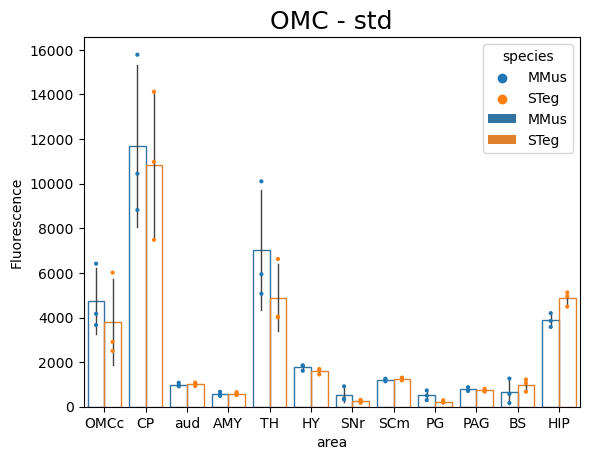

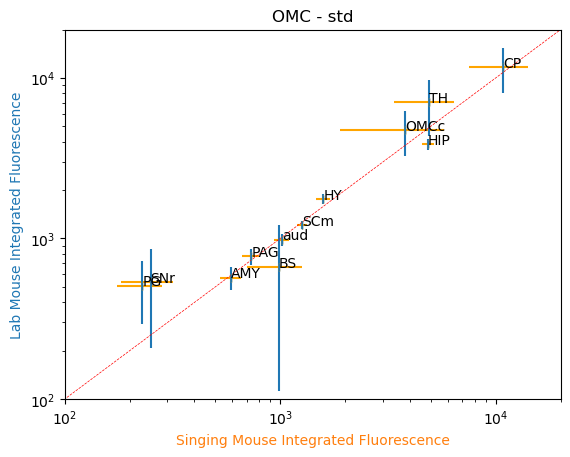

In [78]:

# make dot plot
dot_bar_plot(omc_fluor, title="OMC - std", xaxis="area", yaxis="Fluorescence", 
             hueaxis="species", errorbar="sd")
plt.show()
stvmm_area_scatter(omc_fluor, title="OMC - std", ax_limits=(100,20000), err="std")
plt.show()


In [79]:

## ACC
areas_plot = ["ACAc", "CP", "aud", "AMY", "TH", "HY", "SNr", "SCm", "PG", "PAG", "BS", "HIP"]

acc_fluor = calc_fluor_individ(p05_images, metadata, mask_dict, areas_to_plot=areas_plot, inj_site="ACC")
# acc_fluor

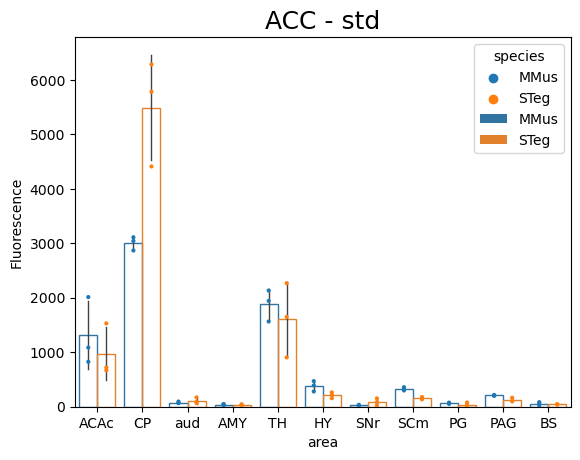

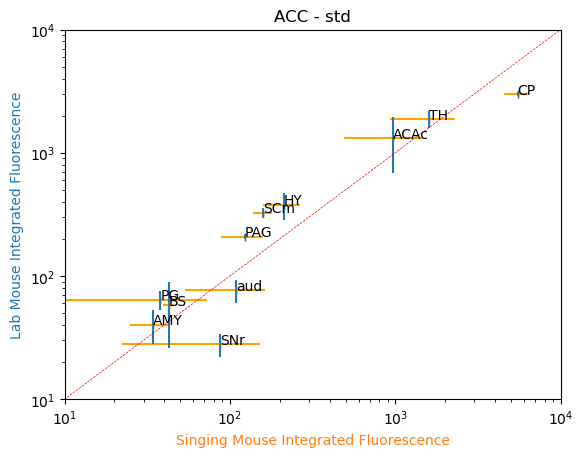

In [59]:
# make dot plot
dot_bar_plot(acc_fluor, title="ACC - std", xaxis="area", yaxis="Fluorescence",
             hueaxis="species", errorbar="sd")
plt.show()

# make scatterplot
stvmm_area_scatter(acc_fluor, title="ACC - std", ax_limits=(10,10000), 
                   err="std")
plt.show()

# Confidence Interval

In [60]:
# import images
p05_path = in_path+"norm_subtracted/p05_mean_subtracted/"
p05_images = []
for i in range(metadata.shape[0]):
    p05_images.append(tf.imread(p05_path+metadata.loc[i,'brain']+"_p05_NO_subtracted.tif"))


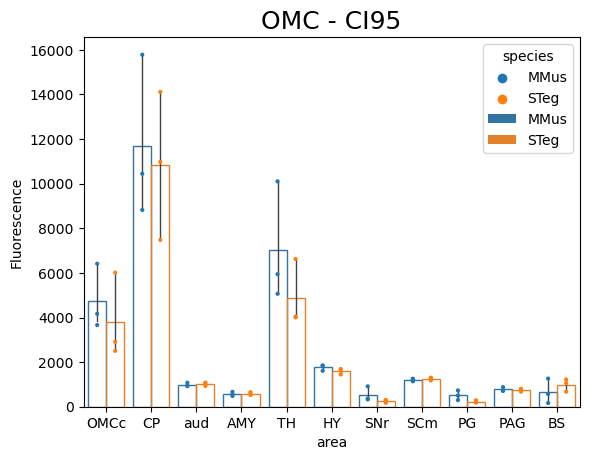

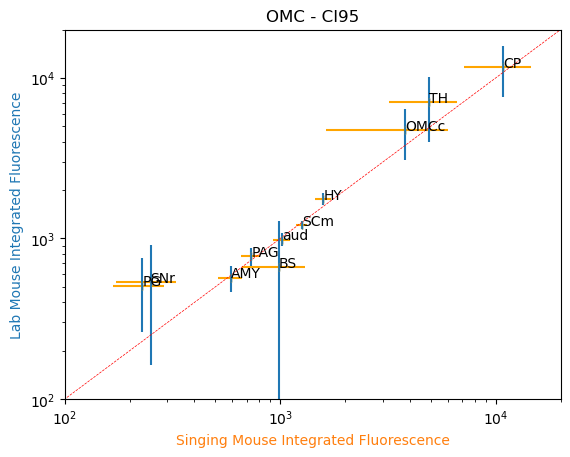

In [61]:

## OMC
# set areas that match w/ mapseq data
areas_plot = ["OMCc", "CP", "aud", "AMY", "TH", "HY", "SNr", "SCm", "PG", "PAG", "BS"]

omc_fluor = calc_fluor_individ(p05_images, metadata, mask_dict, areas_to_plot=areas_plot, inj_site="OMC")
omc_fluor


# make dot plot
dot_bar_plot(omc_fluor, title="OMC - CI95", xaxis="area", yaxis="Fluorescence", 
             hueaxis="species", errorbar="ci")
plt.show()
stvmm_area_scatter(omc_fluor, title="OMC - CI95", ax_limits=(100,20000), err="ci95")
plt.show()



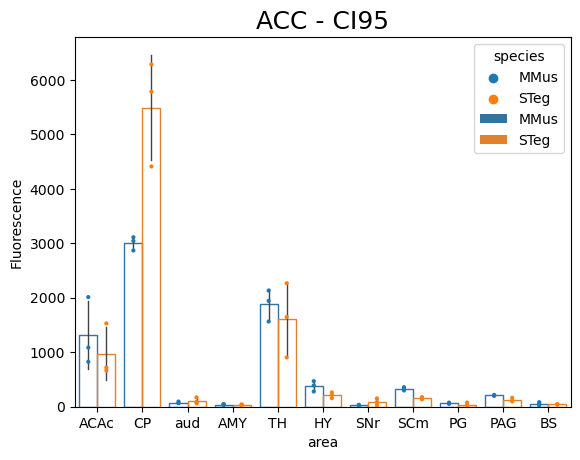

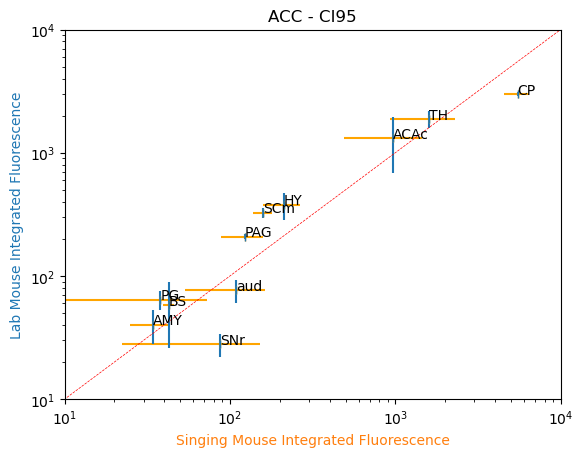

In [62]:

## ACC
areas_plot = ["ACAc", "CP", "aud", "AMY", "TH", "HY", "SNr", "SCm", "PG", "PAG", "BS"]

acc_fluor = calc_fluor_individ(p05_images, metadata, mask_dict, areas_to_plot=areas_plot, inj_site="ACC")
# acc_fluor

# make dot plot
dot_bar_plot(acc_fluor, title="ACC - CI95", xaxis="area", yaxis="Fluorescence",
             hueaxis="species", errorbar="sd")
plt.show()

# make scatterplot
stvmm_area_scatter(acc_fluor, title="ACC - CI95", ax_limits=(10,10000), 
                   err="std")
plt.show()

# Normalized by contralateral fluor

In [63]:
# import images
p05_path = in_path+"norm_subtracted/p05_mean_subtracted/"
p05_images = []
for i in range(metadata.shape[0]):
    p05_images.append(tf.imread(p05_path+metadata.loc[i,'brain']+"_p05_NO_subtracted.tif"))


In [80]:
## OMC

# set areas that match w/ mapseq data
areas_plot = ["OMCc", "CP", "aud", "AMY", "TH", "HY", "SNr", "SCm", "PG", "PAG", "BS", "HIP"]

omc_fluor = calc_fluor_individ(p05_images, metadata, mask_dict, areas_to_plot=areas_plot, 
                               inj_site="OMC")
omc_fluor


,area,Fluorescence,Volume_mm3,brain,species,inj_site
0,OMCc,6412.84380,10997.38,OMC_MMus_220119_b0,MMus,OMC
1,CP,15781.77724,25723.74,OMC_MMus_220119_b0,MMus,OMC
2,aud,956.64824,5689.82,OMC_MMus_220119_b0,MMus,OMC
3,AMY,482.82159,3555.58,OMC_MMus_220119_b0,MMus,OMC
4,TH,10105.07269,19758.36,OMC_MMus_220119_b0,MMus,OMC
...,...,...,...,...,...,...
67,SCm,1292.25799,5598.34,OMC_STeg_220429_b2,STeg,OMC
68,PG,290.36116,631.90,OMC_STeg_220429_b2,STeg,OMC
69,PAG,807.49084,3869.04,OMC_STeg_220429_b2,STeg,OMC
70,BS,674.69179,3665.80,OMC_STeg_220429_b2,STeg,OMC


In [81]:
omc_normed = normalize_by_area(omc_fluor, norm_area="OMCc")
omc_normed


/home/emily/github_repos/STP_analysis/STP_processing.py:238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_fluor['normalized_fluorescence'] = b_normed
/home/emily/github_repos/STP_analysis/STP_processing.py:238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_fluor['normalized_fluorescence'] = b_normed
/home/emily/github_repos/STP_analysis/STP_processing.py:238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

,area,Fluorescence,Volume_mm3,brain,species,inj_site,normalized_fluorescence
0,OMCc,6412.84380,10997.38,OMC_MMus_220119_b0,MMus,OMC,1.000000
1,CP,15781.77724,25723.74,OMC_MMus_220119_b0,MMus,OMC,2.460964
2,aud,956.64824,5689.82,OMC_MMus_220119_b0,MMus,OMC,0.149177
3,AMY,482.82159,3555.58,OMC_MMus_220119_b0,MMus,OMC,0.075290
4,TH,10105.07269,19758.36,OMC_MMus_220119_b0,MMus,OMC,1.575755
...,...,...,...,...,...,...,...
67,SCm,1292.25799,5598.34,OMC_STeg_220429_b2,STeg,OMC,0.214941
68,PG,290.36116,631.90,OMC_STeg_220429_b2,STeg,OMC,0.048296
69,PAG,807.49084,3869.04,OMC_STeg_220429_b2,STeg,OMC,0.134310
70,BS,674.69179,3665.80,OMC_STeg_220429_b2,STeg,OMC,0.112221


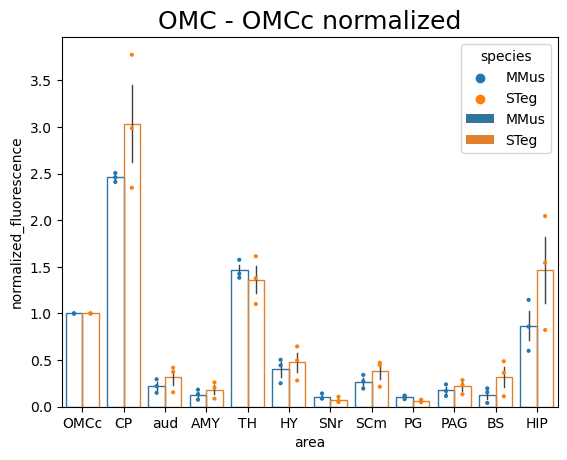

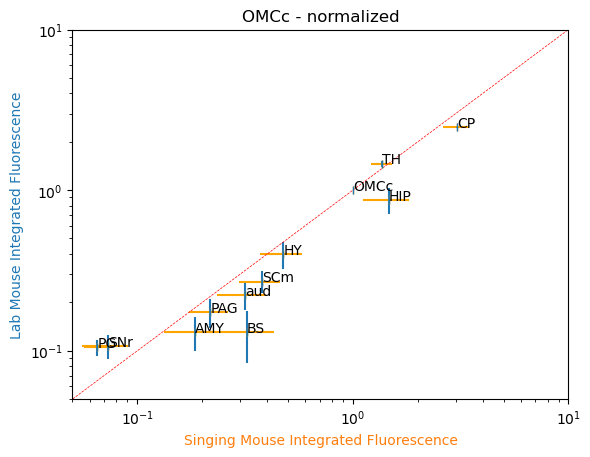

In [86]:

# make dot plot
dot_bar_plot(omc_normed, title="OMC - OMCc normalized", xaxis="area", 
             yaxis="normalized_fluorescence", hueaxis="species")
plt.show()
stvmm_area_scatter(omc_normed, title="OMCc - normalized", ax_limits=(0.05, 10),
                   to_plot="normalized_fluorescence")
plt.show()


In [88]:

## ACC
areas_plot = ["ACAc", "CP", "aud", "AMY", "TH", "HY", "SNr", "SCm", "PG", "PAG", "BS", "HIP"]

acc_fluor = calc_fluor_individ(p05_images, metadata, mask_dict, areas_to_plot=areas_plot, inj_site="ACC")
acc_norm = normalize_by_area(acc_fluor, norm_area="ACAc")
acc_norm

/home/emily/github_repos/STP_analysis/STP_processing.py:238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_fluor['normalized_fluorescence'] = b_normed
/home/emily/github_repos/STP_analysis/STP_processing.py:238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_fluor['normalized_fluorescence'] = b_normed
/home/emily/github_repos/STP_analysis/STP_processing.py:238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

,area,Fluorescence,Volume_mm3,brain,species,inj_site,normalized_fluorescence
0,ACAc,1085.89226,2857.06,ACC_MMus_230403_b1,MMus,ACC,1.000000
1,CP,3110.44317,25513.74,ACC_MMus_230403_b1,MMus,ACC,2.864412
2,aud,66.86299,6602.36,ACC_MMus_230403_b1,MMus,ACC,0.061574
3,AMY,46.32795,4212.38,ACC_MMus_230403_b1,MMus,ACC,0.042663
4,TH,1943.69694,19682.74,ACC_MMus_230403_b1,MMus,ACC,1.789954
...,...,...,...,...,...,...,...
67,SCm,135.51177,5714.96,ACC_STeg_230501_b3,STeg,ACC,0.088595
68,PG,13.42155,427.36,ACC_STeg_230501_b3,STeg,ACC,0.008775
69,PAG,164.40060,4058.08,ACC_STeg_230501_b3,STeg,ACC,0.107482
70,BS,39.05948,4428.10,ACC_STeg_230501_b3,STeg,ACC,0.025536


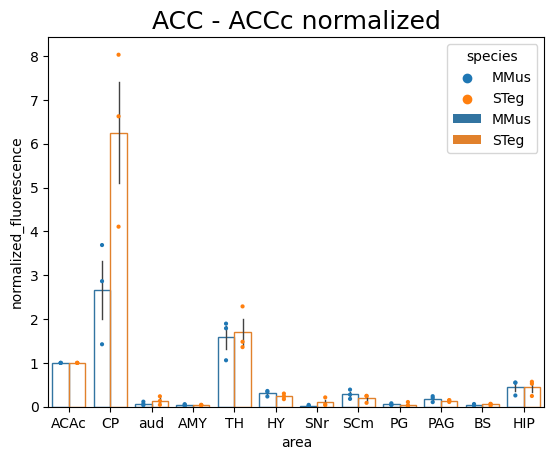

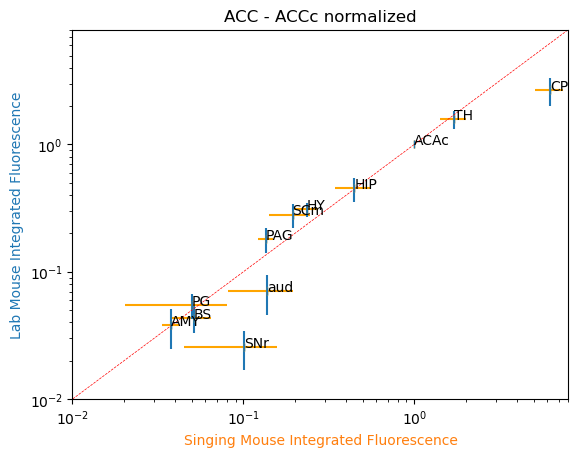

In [91]:

# make dot plot
dot_bar_plot(acc_norm, title="ACC - ACCc normalized", xaxis="area", 
             yaxis="normalized_fluorescence", hueaxis="species")
plt.show()

# make scatterplot
stvmm_area_scatter(acc_norm, title="ACC - ACCc normalized", 
                   ax_limits=(0.01, 8), to_plot="normalized_fluorescence")
plt.show()

# HIP Subtraction

## OMC


In [96]:
# import images
p05_path = in_path+"norm_subtracted/p05_mean_subtracted/"
p05_images = []
for i in range(metadata.shape[0]):
    p05_images.append(tf.imread(p05_path+metadata.loc[i,'brain']+"_p05_norm_subtracted.tif"))



In [97]:
# set areas that match w/ mapseq data
areas_plot = ["OMCc", "CP", "aud", "AMY", "TH", "HY", "SNr", "SCm", "PG", "PAG", "BS", "HIP"]

omc_fluor = calc_fluor_individ(p05_images, metadata, mask_dict, areas_to_plot=areas_plot, inj_site="OMC")
omc_fluor


,area,Fluorescence,Volume_mm3,brain,species,inj_site
0,OMCc,4768.73549,10997.38,OMC_MMus_220119_b0,MMus,OMC
1,CP,11936.07811,25723.74,OMC_MMus_220119_b0,MMus,OMC
2,aud,106.02015,5689.82,OMC_MMus_220119_b0,MMus,OMC
3,AMY,-48.73762,3555.58,OMC_MMus_220119_b0,MMus,OMC
4,TH,7151.19787,19758.36,OMC_MMus_220119_b0,MMus,OMC
...,...,...,...,...,...,...
67,SCm,430.11363,5598.34,OMC_STeg_220429_b2,STeg,OMC
68,PG,193.04856,631.90,OMC_STeg_220429_b2,STeg,OMC
69,PAG,211.65868,3869.04,OMC_STeg_220429_b2,STeg,OMC
70,BS,110.15859,3665.80,OMC_STeg_220429_b2,STeg,OMC


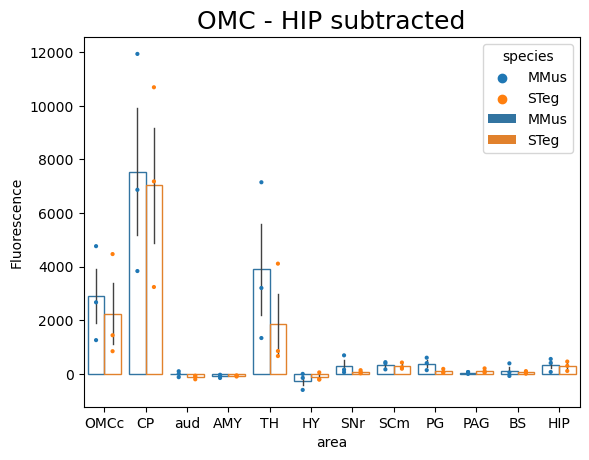

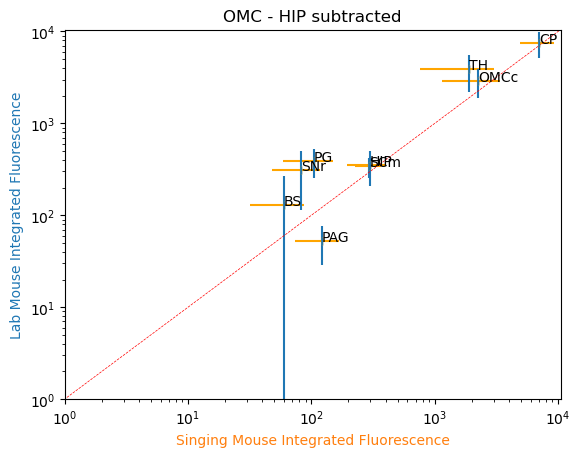

In [100]:

# make dot plot
dot_bar_plot(omc_fluor, title="OMC - HIP subtracted", xaxis="area", yaxis="Fluorescence", hueaxis="species")
plt.show()
stvmm_area_scatter(omc_fluor, title="OMC - HIP subtracted", ax_limits=(1,10500))
plt.show()


## ACC

In [ ]:

areas_plot = ["ACAc", "CP", "aud", "AMY", "TH", "HY", "SNr", "SCm", "PG", "PAG", "BS", "HIP"]

acc_fluor = calc_fluor_individ(p05_images, metadata, mask_dict, areas_to_plot=areas_plot, inj_site="ACC")


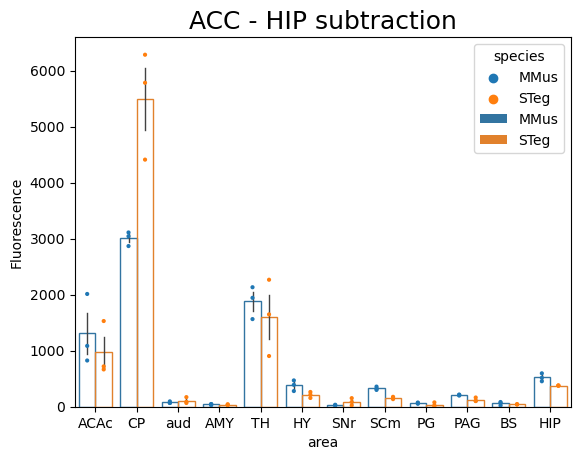

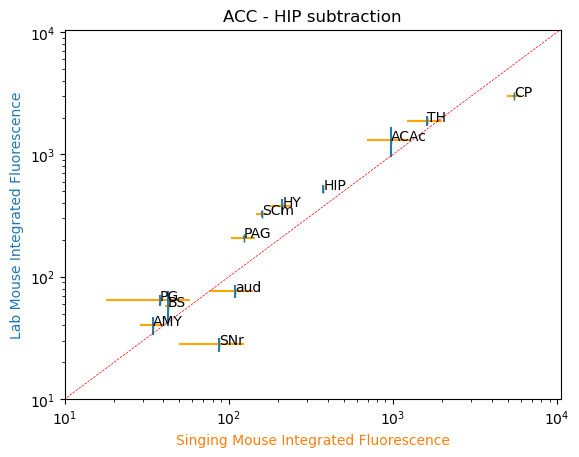

In [105]:

# make dot plot
dot_bar_plot(acc_fluor, title="ACC - HIP subtraction", xaxis="area", yaxis="Fluorescence", hueaxis="species")
plt.show()

# make scatterplot
stvmm_area_scatter(acc_fluor, title="ACC - HIP subtraction", ax_limits=(10,10500))
plt.show()